In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [125]:
class KMeans:

    def __init__(self, n_clusters=2):
        self.n_clusters = n_clusters
    
    def fit(self, X):
        self.X = X
        self.n_sample = X.shape[0]
        center = np.random.randint(0, self.n_sample,size=self.n_clusters)
        self.cluster_centers_ = X[center]
        self._iteration()
    
    def predict(self):
        return self.labels_
    
    def _iteration(self):
        stop = False
        itera_times = 1
        while not stop:
            if itera_times > 30:
                stop = True
            itera_times += 1
            self._calc_center()
            new_cluster_centers_ = np.array([self.X[self.labels_ == i].mean(0)
                            for i in range(self.n_clusters)])
            if np.all(new_cluster_centers_ == self.cluster_centers_):
                stop = True
            self.cluster_centers_ = new_cluster_centers_
    
    def _calc_center(self):
        self.inertia_ = 0
        self.labels_ = np.zeros(self.n_sample)
        for i in range(self.n_sample):
            squared_error = (self.cluster_centers_- self.X[i]) ** 2
            sum_squared_error = squared_error.sum(axis=1)
            self.inertia_ = sum_squared_error.sum()
            label = np.argmin(sum_squared_error)
            self.labels_[i] = label

In [126]:
seeds_dataset = pd.read_csv('./seeds_dataset.csv').values
iris_dataset = pd.read_csv('./iris_data.csv').values

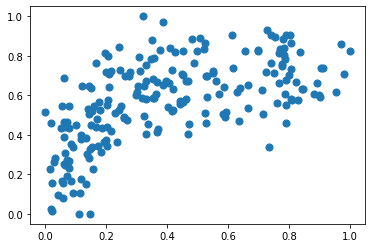

In [127]:
X = seeds_dataset[:, [0,2]]
plt.scatter(X[:, 0], X[:, 1], s=50)

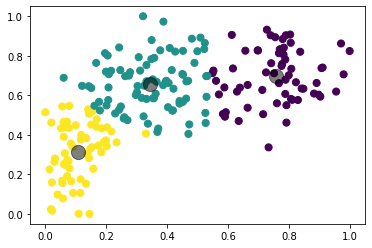

In [128]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict()
y_kmeans
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [ ]:
X = iris_dataset[:, [0,1]]